**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**

# Evaluation Metrics for Classification Models
This section describes the common metrics used to evaluate the performance of classification models.

## 1. Confusion Matrix
The confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).

|                    | Predicted: Positive | Predicted: Negative |
|--------------------|---------------------|---------------------|
| **Actual: Positive** | TP                  | FN                  |
| **Actual: Negative** | FP                  | TN                  |

- **TP (True Positive)**: The model correctly predicted a positive instance.
- **FP (False Positive)**: The model incorrectly predicted a negative instance as positive (Type I error).
- **FN (False Negative)**: The model incorrectly predicted a positive instance as negative (Type II error).
- **TN (True Negative)**: The model correctly predicted a negative instance.

---

## 2. Accuracy
Accuracy measures the overall correctness of the model's predictions.

**Formula**:  
$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $

**Limitations**:  
Accuracy can be misleading for imbalanced datasets (where one class has significantly more samples than the other).

---

## 3. Precision
Precision measures the proportion of true positives among the instances predicted as positive. It answers the question: "Of all the positive predictions, how many were actually correct?"

**Formula**:  
$ \text{Precision} = \frac{TP}{TP + FP} $

**Importance**:  
High precision is important when the cost of false positives is high.

---

## 4. Recall (Sensitivity or True Positive Rate)
Recall measures the proportion of true positives among all actual positive instances. It answers the question: "Of all the actual positive instances, how many did the model correctly identify?"

**Formula**:  
$ \text{Recall} = \frac{TP}{TP + FN} $

**Importance**:  
High recall is important when the cost of false negatives is high.

---

## 5. F1-score
The F1-score is the harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives.

**Formula**:  
$ \text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $

**Importance**:  
Useful when there's a trade-off between precision and recall, especially in imbalanced datasets.

---

## 6. ROC Curve and AUC (Area Under the Curve)
- **ROC Curve (Receiver Operating Characteristic)**: Plots the true positive rate (TPR, which is the same as recall) against the false positive rate (FPR) at various threshold settings.
- **FPR (False Positive Rate)**:  
  $ \text{FPR} = \frac{FP}{FP + TN} $

- **AUC (Area Under the Curve)**:  
  Measures the ability of the classifier to distinguish between classes. An AUC of 1 represents a perfect classifier, while an AUC of 0.5 represents a classifier that performs no better than random chance.

**Importance**:  
ROC-AUC is useful for comparing the performance of different classifiers, especially when dealing with imbalanced datasets. It's less sensitive to class imbalance than accuracy.

---

### Example
Let's say we have the following confusion matrix:

|                    | Predicted: Spam | Predicted: Not Spam |
|--------------------|----------------|---------------------|
| **Actual: Spam**   | 30             | 10                  |
| **Actual: Not Spam** | 20             | 40                  |

From this, we calculate:

- **Accuracy**:  
  $ \text{Accuracy} = \frac{30 + 40}{30 + 10 + 20 + 40} = 0.7 \text{ or } 70\% $

- **Precision**:  
  $ \text{Precision} = \frac{30}{30 + 20} = 0.6 \text{ or } 60\% $

- **Recall**:  
  $ \text{Recall} = \frac{30}{30 + 10} = 0.75 \text{ or } 75\% $

- **F1-score**:  
  $ \text{F1-score} = 2 \cdot \frac{0.6 \cdot 0.75}{0.6 + 0.75} \approx 0.67 \text{ or } 67\% $

- **FPR**:  
  $ \text{FPR} = \frac{20}{20 + 40} = 0.33 \text{ or } 33\% $


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay

In [ ]:
# 1. Generate synthetic data (imbalanced for better demonstration of metrics)
X, y=make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, weights=[0.9, 0.1], random_state=42)# Imbalanced classes

* Imbalanced Dataset: The make_classification function now uses weights=[0.9, 0.1] to create an imbalanced dataset. This makes the differences between the metrics more pronounced and demonstrates the importance of using metrics beyond just accuracy

In [ ]:

df=pd.DataFrame(X,y)
df.head()



,0
0,-0.351090
1,1.153597
1,0.859397
1,2.033645
0,-1.205785


In [ ]:
#split the data
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# 3. Train a Logistic Regression model
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 4. Make predictions and get probabilities
y_pred=model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class


* Probability Predictions: The code now correctly uses predict_proba() to get probability scores, which are essential for ROC curve calculation and threshold tuning.

In [ ]:
# 5. Calculate and print metrics
cm= confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Confusion Matrix:
[[265   3]
 [ 14  18]]
Accuracy: 0.9433
Precision: 0.8571
Recall: 0.5625
F1-score: 0.6792


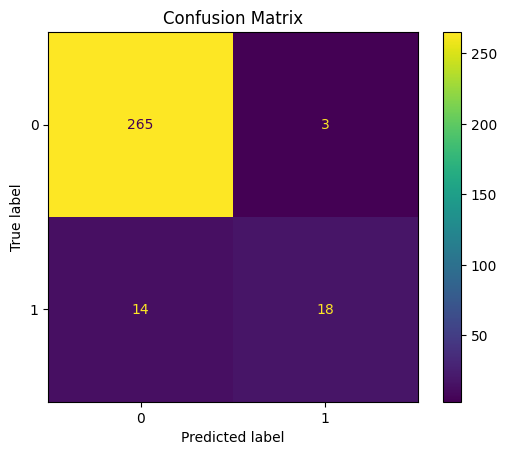

In [ ]:
#Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

* we got good precision score(less false positives) then recall score(more false negatives), but i need my model to classify 0 class correctly even there are few false positives so lets observe roc curve and change the threshold parameter to increase the recall.

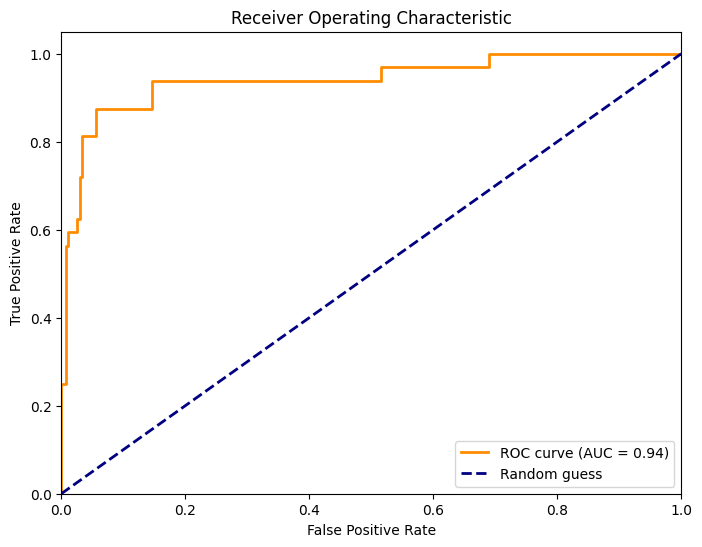

In [ ]:
# 6. Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# 7. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 8. Threshold Tuning (for maximizing recall)
desired_recall = 0.9  # Example: Aim for 90% recall
threshold_for_desired_recall = thresholds[np.argmin(np.abs(tpr - desired_recall))]

In [ ]:
# Apply the tuned threshold
y_pred_tuned = (y_proba >= threshold_for_desired_recall).astype(int)

#Evaluate with tuned threshold
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("\nEvaluation after threshold tuning:")
print("Confusion Matrix:")
print(cm_tuned)

print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-score: {f1_tuned:.4f}")


Evaluation after threshold tuning:
Confusion Matrix:
[[253  15]
 [  4  28]]
Accuracy: 0.9367
Precision: 0.6512
Recall: 0.8750
F1-score: 0.7467


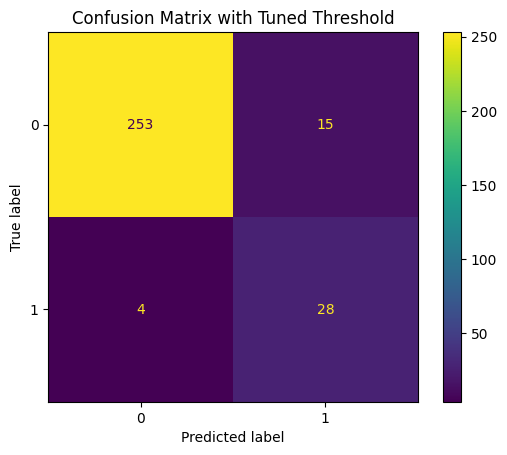

In [ ]:
#Plot Confusion Matrix for tuned threshold
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=model.classes_)
disp_tuned.plot()
plt.title('Confusion Matrix with Tuned Threshold')
plt.show()

* I increase the recall score by sacrificing the precision  and for real time datasets we need to perform feature engineering, cross-validation, hyperparamater tuning in cv, hyper parameter tuning for hold-out method(uisng GridSearch), regularization and other methods for tuning the model for our use cases , i did not implement any of these as it is for just metrics implementation.

## Cohen's Kappa and Matthews Correlation Coefficient (MCC)

### Cohen's Kappa:

*   **Purpose:** Measures the agreement between two raters (or a classifier and ground truth labels), taking into account the possibility of agreement occurring by chance.
*   **Range:** -1 to 1:
    *   1: Perfect agreement.
    *   0: Agreement equivalent to chance.
    *   < 0: Agreement worse than chance (rarely seen in practice).
*   **Formula (simplified):** $Kappa = \frac{(Observed Agreement - Chance Agreement)}{(1 - Chance Agreement)}$
*   **Usefulness:** Useful when you want to assess how much better your classifier is compared to random guessing, especially in imbalanced datasets where accuracy can be misleading.

### Matthews Correlation Coefficient (MCC):

*   **Purpose:** Measures the correlation between the predicted and actual classifications. It's a balanced measure that takes into account true and false positives and negatives, making it suitable for imbalanced datasets.
*   **Range:** -1 to 1:
    *   1: Perfect prediction.
    *   0: Prediction no better than random guessing.
    *   -1: Total disagreement between prediction and observation.
*   **Formula:** $MCC = \frac{(TP * TN - FP * FN)}{\sqrt{(TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)}}$
*   **Usefulness:** Considered one of the best single-value summary metrics for classification, especially when dealing with imbalanced datasets. It's less sensitive to class imbalance than accuracy, precision, or recall alone.

### Why are they important, especially for imbalanced datasets?

Let's say you have a dataset where 95% of the samples belong to the negative class and only 5% belong to the positive class. A classifier that always predicts "negative" would achieve 95% accuracy, which seems very good. However, it would completely fail to identify any positive instances.

In this scenario:

*   Accuracy would be misleadingly high.
*   Precision and Recall would give you different perspectives: Precision might be undefined (if there are no true positives), and recall would be 0.
*   Cohen's Kappa and MCC would be much lower, reflecting the fact that the classifier is not doing a good job of distinguishing between the classes.

### In summary:

*   Cohen's Kappa measures agreement beyond chance.
*   MCC measures the correlation between predicted and actual classifications.
*   Both are particularly useful for imbalanced datasets where accuracy can be misleading. MCC is often considered a more robust single-value metric than Kappa.

If you are working with imbalanced datasets, it's very better to include Cohen's Kappa and MCC in your evaluation. They provide a more balanced and informative assessment of your classifier's performance.

Confusion Matrix:
[[283   2]
 [ 10   5]]
Cohen's Kappa: 0.4366
Matthews Correlation Coefficient (MCC): 0.4711


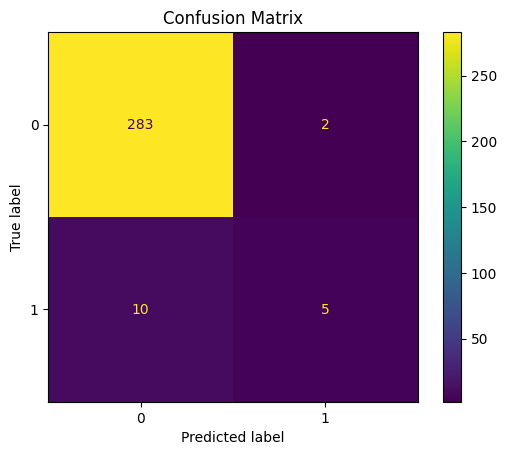

In [39]:

from sklearn.metrics import cohen_kappa_score, matthews_corrcoef

# 1. Generate imbalanced synthetic data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, weights=[0.95, 0.05], random_state=42) # Imbalanced!

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Calculate and print metrics
cm = confusion_matrix(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()



Example of a classifier that always predicts the majority class
Confusion Matrix:
[[285   0]
 [ 15   0]]
Accuracy: 0.9500
Cohen's Kappa: 0.0000
Matthews Correlation Coefficient (MCC): 0.0000


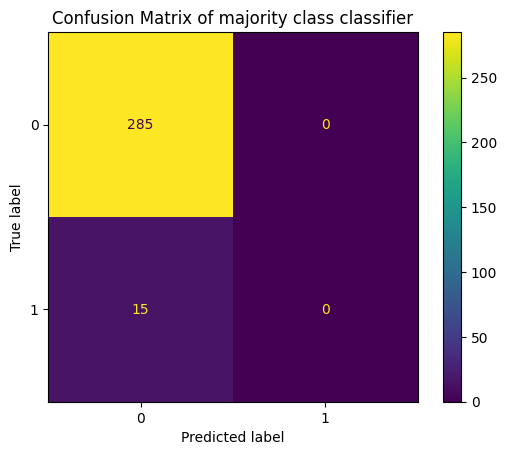

In [40]:
#Example of a classifier that always predicts the majority class
y_pred_majority = np.zeros(len(y_test)) #Predicts always 0

cm_majority = confusion_matrix(y_test, y_pred_majority)
accuracy_majority = accuracy_score(y_test, y_pred_majority)
kappa_majority = cohen_kappa_score(y_test, y_pred_majority)
mcc_majority = matthews_corrcoef(y_test, y_pred_majority)

print("\nExample of a classifier that always predicts the majority class")
print("Confusion Matrix:")
print(cm_majority)
print(f"Accuracy: {accuracy_majority:.4f}")
print(f"Cohen's Kappa: {kappa_majority:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_majority:.4f}")

disp_majority = ConfusionMatrixDisplay(confusion_matrix=cm_majority, display_labels=model.classes_)
disp_majority.plot()
plt.title('Confusion Matrix of majority class classifier')
plt.show()

**High Accuracy**: Even for a simple model (or even a model that always predicts the majority class), the accuracy will be high because the majority class dominates(here 95%).

**Low Kappa and MCC for the majority class classifier:** The Kappa and MCC for the model that always predicts the majority class is low (0), indicating that the model is not performing better than random chance, despite the high accuracy.

## Regression Metrics

Let's dive into regression metrics. These metrics are used to evaluate the performance of models that predict continuous values (as opposed to classification models, which predict categories).

Here are the most common regression metrics:

### Mean Squared Error (MSE)

*   Calculates the average of the squared differences between the predicted and actual values.
*   Formula: $MSE = (1/n) * Σ(y_i - ŷ_i)^2$, where:
    *   $n$ is the number of data points
    *   $y_i$ is the actual value for the i-th data point
    *   $ŷ_i$ is the predicted value for the i-th data point
*   Sensitive to outliers because the errors are squared. Larger errors have a disproportionately large impact on the MSE.
*   Units are the square of the target variable's units.

### Root Mean Squared Error (RMSE)

*   The square root of the MSE.
*   Formula: $RMSE = \sqrt{MSE}$
*   More interpretable than MSE because it's in the same units as the target variable.
*   Still sensitive to outliers.

### Mean Absolute Error (MAE)

*   Calculates the average of the absolute differences between the predicted and actual values.
*   Formula: $MAE = (1/n) * Σ|y_i - ŷ_i|$
*   Less sensitive to outliers than MSE and RMSE because it doesn't square the errors.
*   Units are the same as the target variable's units.

### R-squared (Coefficient of Determination)

*   Represents the proportion of the variance in the dependent variable (target variable) that is predictable from the independent variables (features).
*   Formula: $R^2 = 1 - (SS_{res} / SS_{tot})$, where:
    *   $SS_{res}$ is the sum of squared residuals (same as the numerator in MSE multiplied by n).
    *   $SS_{tot}$ is the total sum of squares (the variance of the target variable multiplied by n).
*   Ranges from 0 to 1.
    *   $R^2 = 1$: The model perfectly explains the variance in the target variable.
    *   $R^2 = 0$: The model does not explain any variance in the target variable (it's no better than predicting the mean of the target variable).
*   Can be negative if the model performs worse than predicting the mean.
*   Not as sensitive to outliers as MSE/RMSE, but can still be affected if the outliers significantly influence the variance of the target variable.

### Example:

Let's say you have the following actual and predicted values:

| Data Point | Actual ($y_i$) | Predicted ($ŷ_i$) |
|------------|----------------|-------------------|
| 1          | 10             | 12                |
| 2          | 15             | 13                |
| 3          | 20             | 18                |
| 4          | 25             | 27                |

### Calculations:

$MSE = [(10-12)^2 + (15-13)^2 + (20-18)^2 + (25-27)^2] / 4 = [4 + 4 + 4 + 4] / 4 = 4$

$RMSE = \sqrt{4} = 2$

$MAE = [|10-12| + |15-13| + |20-18| + |25-27|] / 4 = [2 + 2 + 2 + 2] / 4 = 2$

To calculate R-squared, we need the mean of the actual values:

$Mean(y) = (10 + 15 + 20 + 25) / 4 = 17.5$

$SS_{tot} = [(10-17.5)^2 + (15-17.5)^2 + (20-17.5)^2 + (25-17.5)^2] = 56.25 + 6.25 + 6.25 + 56.25 = 125$

$SS_{res} = 4 * MSE = 4 * 4 = 16$

$R^2 = 1 - (16 / 125) = 1 - 0.128 = 0.872$

### Choosing the Right Metric:

*   **MSE/RMSE:** Use when you want to penalize larger errors more heavily. Sensitive to outliers. RMSE is generally preferred over MSE due to its interpretability.
*   **MAE:** Use when you want to give equal weight to all errors and are less concerned about outliers.
*   **R-squared:** Use when you want to understand the proportion of variance explained by the model. Be aware of its limitations, especially when comparing models with different numbers of predictors.

In most cases, RMSE and MAE are preferred over MSE due to their interpretability. The choice between RMSE and MAE depends on the sensitivity to outliers. R-squared provides a different perspective on model fit, focusing on variance explained. It's often useful to consider multiple metrics to get a comprehensive understanding of your model's performance.

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# 1. Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42) #noise added to make it more realistic

In [ ]:
df=pd.DataFrame(X,y)
df.head()

,0
-28.181274,-0.808298
-2.021016,0.096996
13.033158,0.473238
-131.667239,-1.478522
-18.195687,-0.385314


In [ ]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 3. Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 4. Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# 5. Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 413.89
Root Mean Squared Error (RMSE): 20.34
Mean Absolute Error (MAE): 17.39
R-squared (R²): 0.81


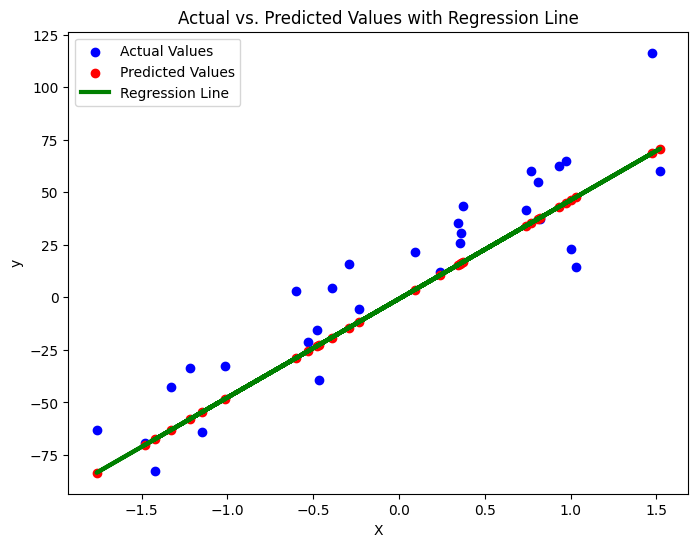

In [ ]:
# 6. Plot the predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label="Actual Values", color = 'blue')
plt.scatter(X_test, y_pred, label="Predicted Values", color = 'red')
#Plot the regression line
plt.plot(X_test, model.predict(X_test), color='green', linewidth=3, label = 'Regression Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Actual vs. Predicted Values with Regression Line")
plt.legend()
plt.show()

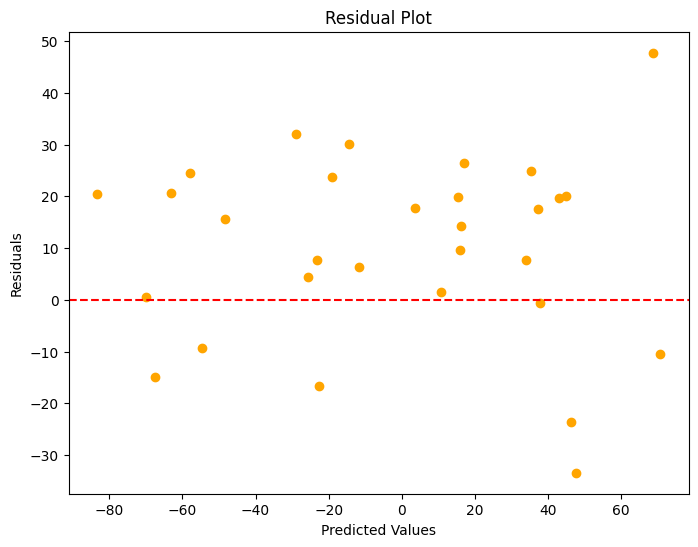

In [ ]:
 #7. Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color = 'orange')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

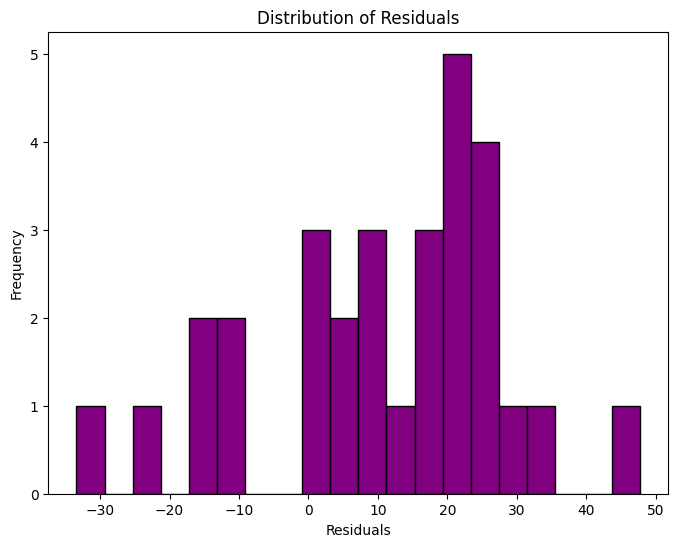

In [ ]:
# 8. Distribution of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color = 'purple', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()



### Synthetic Data with Noise

The `make_regression` function now includes `noise=20`. This adds random noise to the data, making it more realistic and preventing perfect fits.


### Plot of Predictions vs. Actual Values

A scatter plot is now included to visualize the relationship between the actual and predicted values. This helps to see how well the model is fitting the data. The regression line is also plotted along with the scatter plot.

### Residual Plot

A residual plot is added. This plot is essential for checking the assumptions of linear regression (homoscedasticity, linearity).

### Distribution of Residuals

A histogram shows the distribution of the residuals. Ideally, the residuals should be normally distributed around zero.


## Clustering Metrics

Let's explore clustering metrics. These metrics are used to evaluate the performance of clustering algorithms, which aim to group similar data points together. Unlike classification or regression, clustering is an unsupervised task, meaning we don't have ground truth labels to compare against in many cases. This makes evaluation more challenging.

Clustering metrics can be broadly categorized into:

*   **Internal Evaluation (Intrinsic):** These metrics evaluate the quality of the clustering based only on the data itself, without external labels.
*   **External Evaluation (Extrinsic):** These metrics compare the clustering results to known ground truth labels (if available).

### Internal Evaluation Metrics:

**Silhouette Score:**

*   Measures how similar a data point is to its own cluster compared to other clusters.
*   Ranges from -1 to 1:
    *   +1: Best value. Indicates that the data point is well within its own cluster and far from other clusters.
    *   0: Indicates overlapping clusters.
    *   -1: Worst value. Indicates that the data point is probably assigned to the wrong cluster.
*   Calculated for each data point and then averaged to get the overall score.
*   Useful for determining the optimal number of clusters.

**Davies-Bouldin Index:**

*   Measures the average "similarity" between each cluster and its most similar cluster.
*   Lower values are better. A value of 0 indicates the best possible clustering.
*   Considers both the within-cluster scatter and the between-cluster separation.

**Calinski-Harabasz Index (Variance Ratio Criterion):**

*   Calculates the ratio of between-cluster variance to within-cluster variance.
*   Higher values are better.
*   Also considers both cohesion (within-cluster similarity) and separation (between-cluster dissimilarity).

### External Evaluation Metrics (Require Ground Truth Labels):

**Adjusted Rand Index (ARI):**

*   Measures the similarity between the clustering results and the ground truth labels, correcting for chance.
*   Ranges from -1 to 1:
    *   1: Perfect match.
    *   0: Random clustering.
    *   Negative values indicate worse than random.

**Normalized Mutual Information (NMI):**

*   Measures the mutual information between the clustering results and the ground truth labels, normalized to a range between 0 and 1.
*   1: Perfect match.
*   0: No mutual information (independent clusterings).

### Example (Conceptual):

Imagine you have data points representing different types of flowers. You cluster them based on their petal length and width.

*   **Internal Evaluation:** You could use the Silhouette Score to assess how well-separated the clusters are based only on the petal measurements. A high Silhouette Score would suggest that flowers within each cluster are very similar in terms of petal size and different from flowers in other clusters.
*   **External Evaluation:** If you also have labels indicating the actual species of each flower, you could use the ARI or NMI to compare your clustering results to the true species. A high ARI or NMI would indicate that your clusters closely match the actual flower species.

### Choosing the Right Metric:

*   Internal metrics are used when you don't have ground truth labels. The Silhouette Score is a popular choice for determining the optimal number of clusters.
*   External metrics are used when you have ground truth labels. ARI and NMI are common choices.

### Important Considerations:

*   **Data Scaling:** Clustering algorithms and some evaluation metrics (like Silhouette Score) can be sensitive to the scale of the features. It's often important to scale your data before clustering.
*   **Number of Clusters:** Determining the optimal number of clusters is a crucial step in clustering. Techniques like the elbow method (using within-cluster sum of squares) or the Silhouette Score can be used for this purpose.
*   **Metric Interpretation:** The interpretation of clustering metrics can depend on the specific dataset and the clustering algorithm used. It's often helpful to use multiple metrics to get a more comprehensive understanding of the clustering results.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler

In [29]:
# 1. Generate synthetic data (with true labels for extrinsic evaluation)
X, y_true = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=1.0, random_state=42)

In [30]:
# 2. Scale the data (important for KMeans and some metrics)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

In [32]:
# 4. Intrinsic Evaluation
silhouette = silhouette_score(X_scaled, y_pred)
db_index = davies_bouldin_score(X_scaled, y_pred)
ch_index = calinski_harabasz_score(X_scaled, y_pred)

print("Intrinsic Evaluation:")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Calinski-Harabasz Index: {ch_index:.4f}")

Intrinsic Evaluation:
Silhouette Score: 0.8482
Davies-Bouldin Index: 0.2107
Calinski-Harabasz Index: 4730.1740


In [33]:
# 5. Extrinsic Evaluation (using true labels)
ari = adjusted_rand_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)

print("\nExtrinsic Evaluation:")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")


Extrinsic Evaluation:
Adjusted Rand Index: 1.0000
Normalized Mutual Information: 1.0000


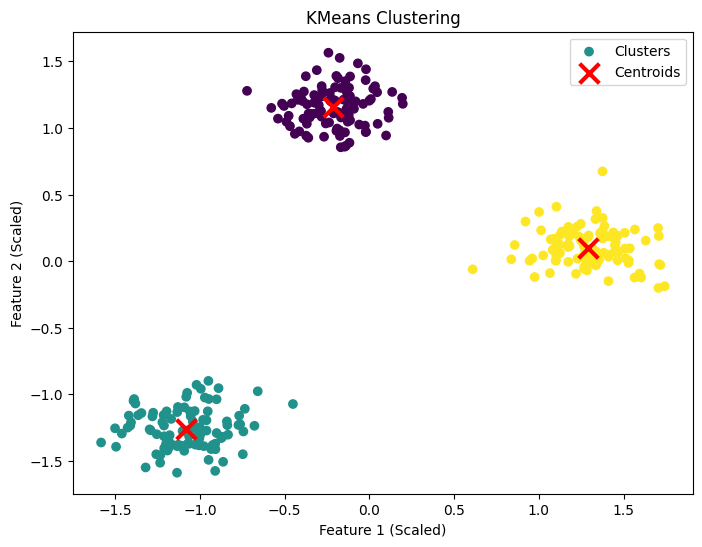

In [34]:
# 6. Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis', label='Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.title("KMeans Clustering")
plt.legend()
plt.show()

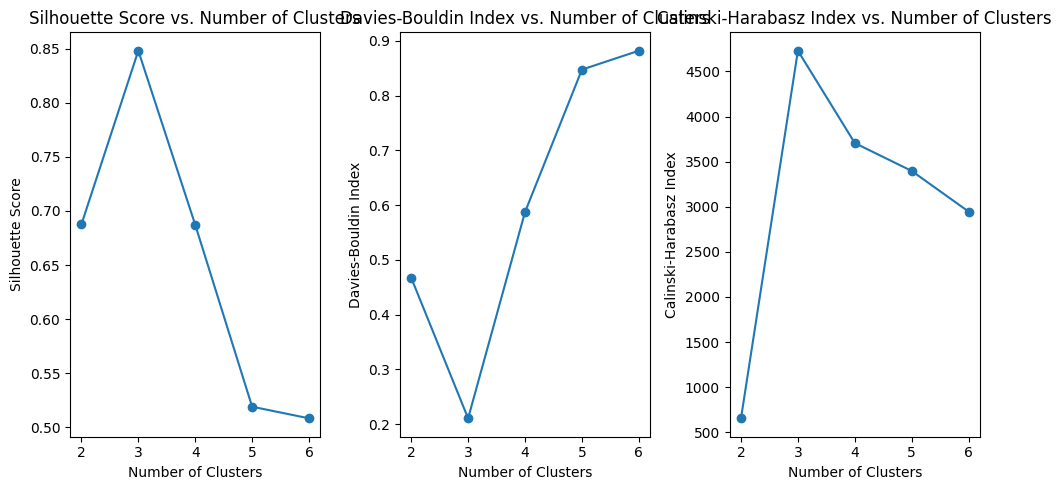

In [35]:
# 7. Impact of number of clusters
silhouettes = []
db_indices = []
ch_indices = []
n_clusters_range = range(2, 7) #Test for 2 to 6 clusters
for n_clusters in n_clusters_range:
    kmeans_test = KMeans(n_clusters=n_clusters, random_state=42)
    y_pred_test = kmeans_test.fit_predict(X_scaled)
    silhouettes.append(silhouette_score(X_scaled, y_pred_test))
    db_indices.append(davies_bouldin_score(X_scaled, y_pred_test))
    ch_indices.append(calinski_harabasz_score(X_scaled, y_pred_test))

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(n_clusters_range, silhouettes, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")

plt.subplot(1, 3, 2)
plt.plot(n_clusters_range, db_indices, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs. Number of Clusters")

plt.subplot(1, 3, 3)
plt.plot(n_clusters_range, ch_indices, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.title("Calinski-Harabasz Index vs. Number of Clusters")

plt.tight_layout()
plt.show()


### Why Use Different Methods?

*   **Availability of Ground Truth:** The most important factor is whether you have ground truth labels. If you do, extrinsic methods are generally preferred because they provide a more direct and objective evaluation. If you don't, you have to rely on intrinsic methods.
*   **Purpose of Clustering:** Sometimes, the goal of clustering is not to match pre-defined categories but to discover new patterns or structures in the data. In such cases, intrinsic methods are more relevant.
*   **Complementary Information:** Even when ground truth labels are available, intrinsic methods can provide complementary information about the clustering structure, such as how well-separated the clusters are in terms of the data's features.